# Customer Respone Prediction

<hr style="border:2px solid black">
<b>import libraries</b>
<hr style="border:2px solid black">

In [3]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing, model_selection
import sklearn.preprocessing as prep
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 


<hr style="border:2px solid black">
<b>Specify the directory to use</b>
<hr style="border:2px solid black">

In [4]:
os.getcwd()
os.chdir('C:\Users\neelk\Documents\UTD\HW1\HW-3')

# Reading the data and reviewing the non-binary variables to see if any are skewed and need to be transformed.

In [5]:
# Read dmtrain.csv and print its contents
dmtrain = pd.read_csv('dmtrain.csv')
print(dmtrain)

# Read dmtest.csv and print its contents
dmtest = pd.read_csv('dmtest.csv')
print(dmtest)


        id  n24  rev24  revlast  elpsdm  ordfreq  ordcat  response
0        1    2   30.0     20.0      24        1       6         1
1        2   25  207.0     20.0      24        1       6         0
2        3    5   52.0     15.0      24        1       6         0
3        4   11  105.0     15.0      24        1       6         0
4        5    2   32.0     17.0      24        1       6         0
...    ...  ...    ...      ...     ...      ...     ...       ...
1995  1996   12  105.0     20.0       1        2       6         0
1996  1997   36  786.0      5.0       1        2       6         0
1997  1998    7  415.0    100.0       1        1       7         0
1998  1999    5   77.0     25.0       1        1       7         0
1999  2000   34  469.0     31.0       1        1       6         0

[2000 rows x 8 columns]
        id  n24  rev24  revlast  elpsdm  ordfreq  ordcat
0     5001    5  186.0       18      24        1       6
1     5002    2   30.0       15      24        1       6


### Lets look at the train data for now
###### Exploring the train dataset

In [6]:
# Print the top 10 rows of the 'dmtrain' dataset
print("----------------------------------Top 10 values----------------------------------------------------")
print(dmtrain.head())

# Print the statistical summary of the 'dmtrain' dataset
print("--------------------------------Stats of the dataset------------------------------------------------------")
print(dmtrain.describe())

# Print the data types information of columns in the 'dmtrain' dataset
print("-----------------------------Dataype info-----------------------------------------------------------")
print(dmtrain.info())

# Check for missing values in the 'dmtrain' dataset
print("---------------------------checking for NA-------------------------------------------------------------")
print(dmtrain.isna)


----------------------------------Top 10 values----------------------------------------------------
   id  n24  rev24  revlast  elpsdm  ordfreq  ordcat  response
0   1    2   30.0     20.0      24        1       6         1
1   2   25  207.0     20.0      24        1       6         0
2   3    5   52.0     15.0      24        1       6         0
3   4   11  105.0     15.0      24        1       6         0
4   5    2   32.0     17.0      24        1       6         0
--------------------------------Stats of the dataset------------------------------------------------------
                id         n24        rev24      revlast       elpsdm  \
count  2000.000000  2000.00000  2000.000000  2000.000000  2000.000000   
mean   1000.500000    10.28550   107.830895    16.863475    15.111000   
std     577.494589     8.81407   126.751417    16.623265     4.150939   
min       1.000000     1.00000    15.000000     0.000000     1.000000   
25%     500.750000     4.00000    43.000000    10.000000

### Drop the customer id column

In [7]:
# drop the id column
dmtrain = dmtrain.drop('id', axis = 1)

## -----------------------------------------------------------

##### Stats Observations

 1. 2000 rows
 2. No NULL values
 3. All variables are int except for rev24 and revlast which are float
 4. Based on Data dictionary n24 , rev24 , revlast and elpsdm are all continuous variables
 5. orderfreq, ordercat and response variables are categorical
 6. Average orders placed by customers in last 24 months is 10 approx, min orderby any customers inlast 24 months has been 1 and max orders placed by a customer is 82.
 7. Average value of total order amount is 107.83, min is 15 and max is 2200 dollars in last 24 months
 8. Average value of last order amount is 16.86, min is 0 and max is 415 in last 24 months
 9. A customer takes average 15 months to order again, min time is  1 month and max is 24 months

## --------------------------------------------------------------

## Checking on continuous and non-binary categorical variables based on training dataset

In [8]:
#Setting styles for the plot
plt.style.use('fivethirtyeight')

##### Histogram of non-binary variables -- n24, rev24, revlast, elpsdm, ordfreq, ordcat based on train data

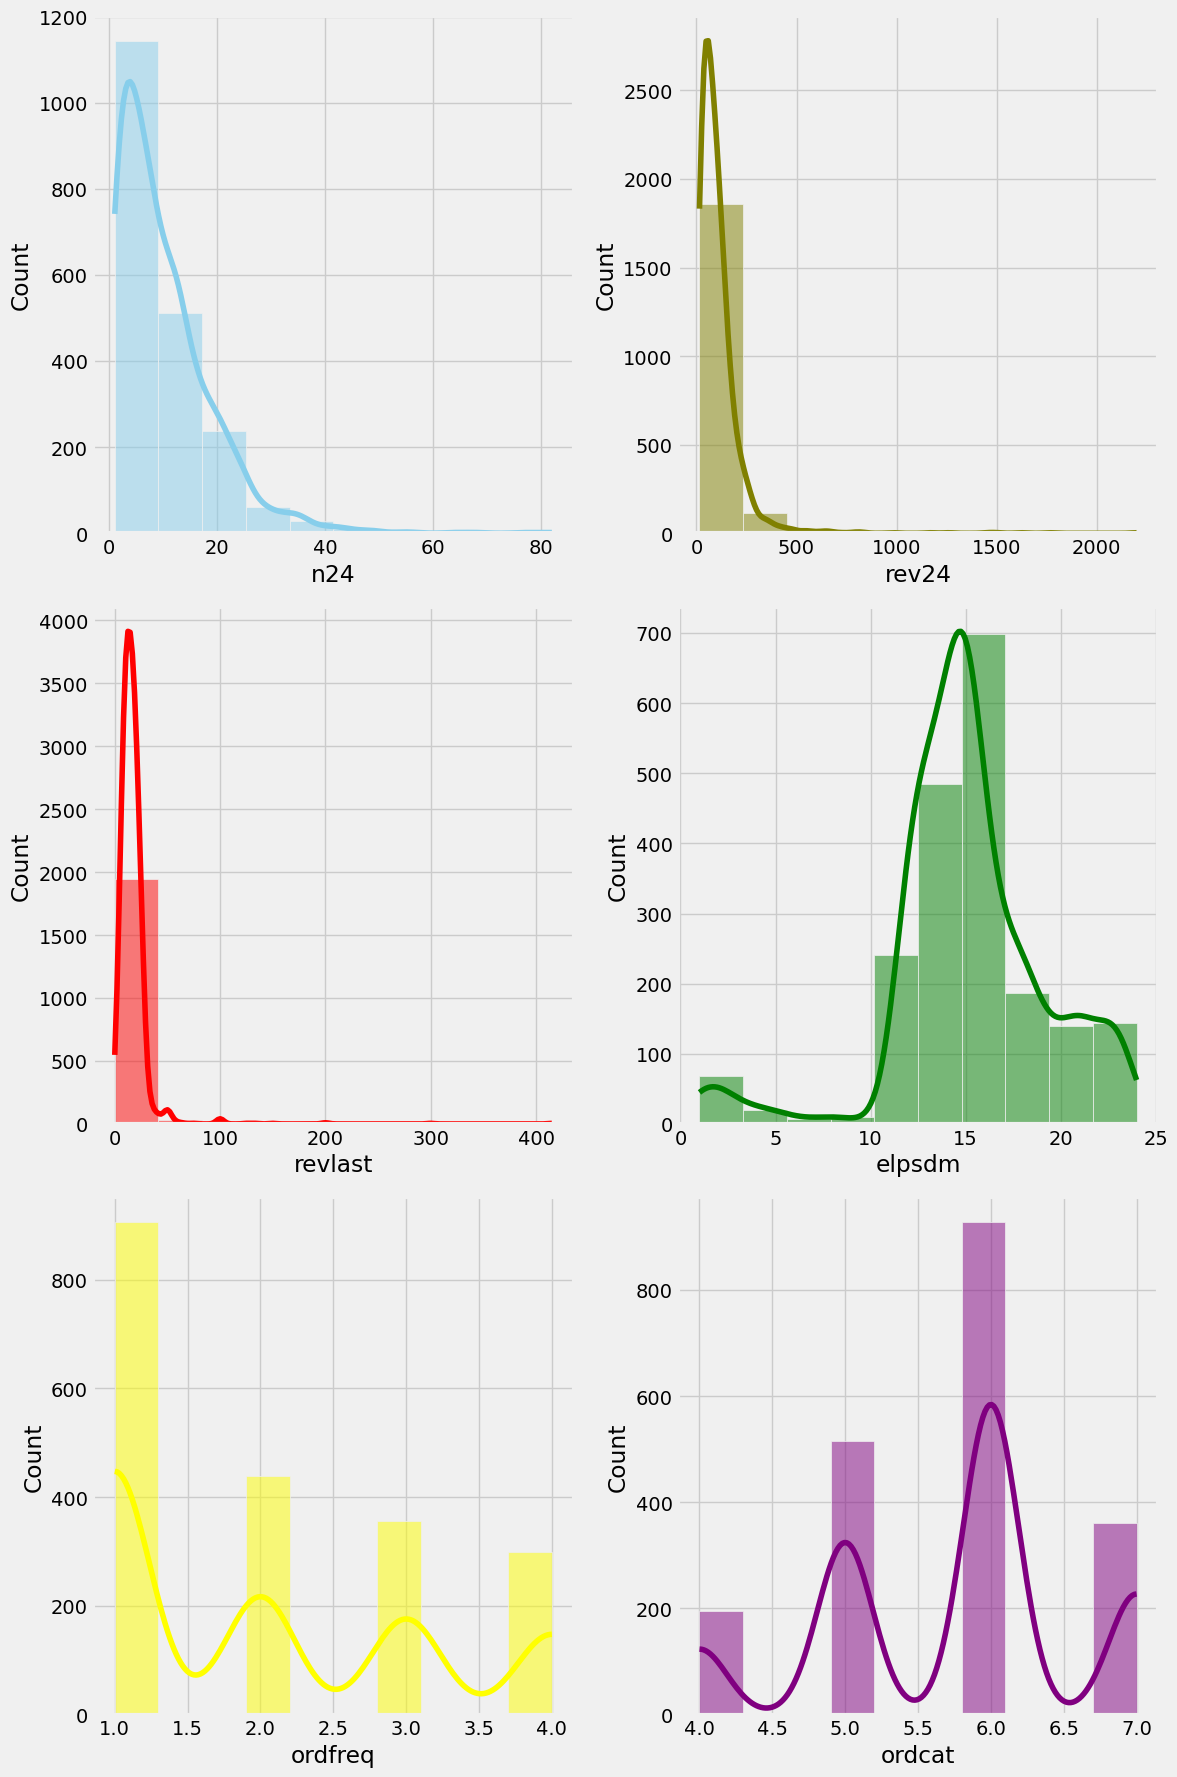

In [9]:
# Create a figure with subplots
f, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot a histogram with kernel density estimation for the 'n24' column
sns.histplot(data=dmtrain, x="n24", kde=True, color="skyblue", bins=10, ax=axs[0,0])

# Plot a histogram with kernel density estimation for the 'rev24' column
sns.histplot(data=dmtrain, x="rev24", kde=True, color="olive", bins=10, ax=axs[0,1])

# Plot a histogram with kernel density estimation for the 'revlast' column
sns.histplot(data=dmtrain, x="revlast", kde=True, color="red", bins=10, ax=axs[1,0])

# Plot a histogram with kernel density estimation for the 'elpsdm' column
sns.histplot(data=dmtrain, x="elpsdm", kde=True, color="green", bins=10, ax=axs[1,1])

# Plot a histogram with kernel density estimation for the 'ordfreq' column
sns.histplot(data=dmtrain, x="ordfreq", kde=True, color="yellow", bins=10, ax=axs[2,0])

# Plot a histogram with kernel density estimation for the 'ordcat' column
sns.histplot(data=dmtrain, x="ordcat", kde=True, color="purple", bins=10, ax=axs[2,1])

# Adjust the layout of the subplots
f.tight_layout()

# Save the figure as 'Plot1.png'
plt.savefig('Plot1.png')

# Show the plot
plt.show()


###### Looks like the data is right skewed for n24 rev24 and revlast
###### We will transform these 3 by log tranformation

In [10]:
# Create a copy of dmtrain as df
df = dmtrain.copy()

# Compute the natural logarithm of the 'n24' column and assign it to 'log_n24'
df['log_n24'] = np.log(df['n24'])

# Compute the natural logarithm of the 'rev24' column and assign it to 'log_rev24'
df['log_rev24'] = np.log(df['rev24'])

# Compute the natural logarithm of the 'revlast' column plus 1 and assign it to 'log_revlast'
df['log_revlast'] = np.log(df['revlast'] + 1)

# Drop the original 'n24', 'rev24', and 'revlast' columns from df
df = df.drop(['n24', 'rev24', 'revlast'], axis=1)


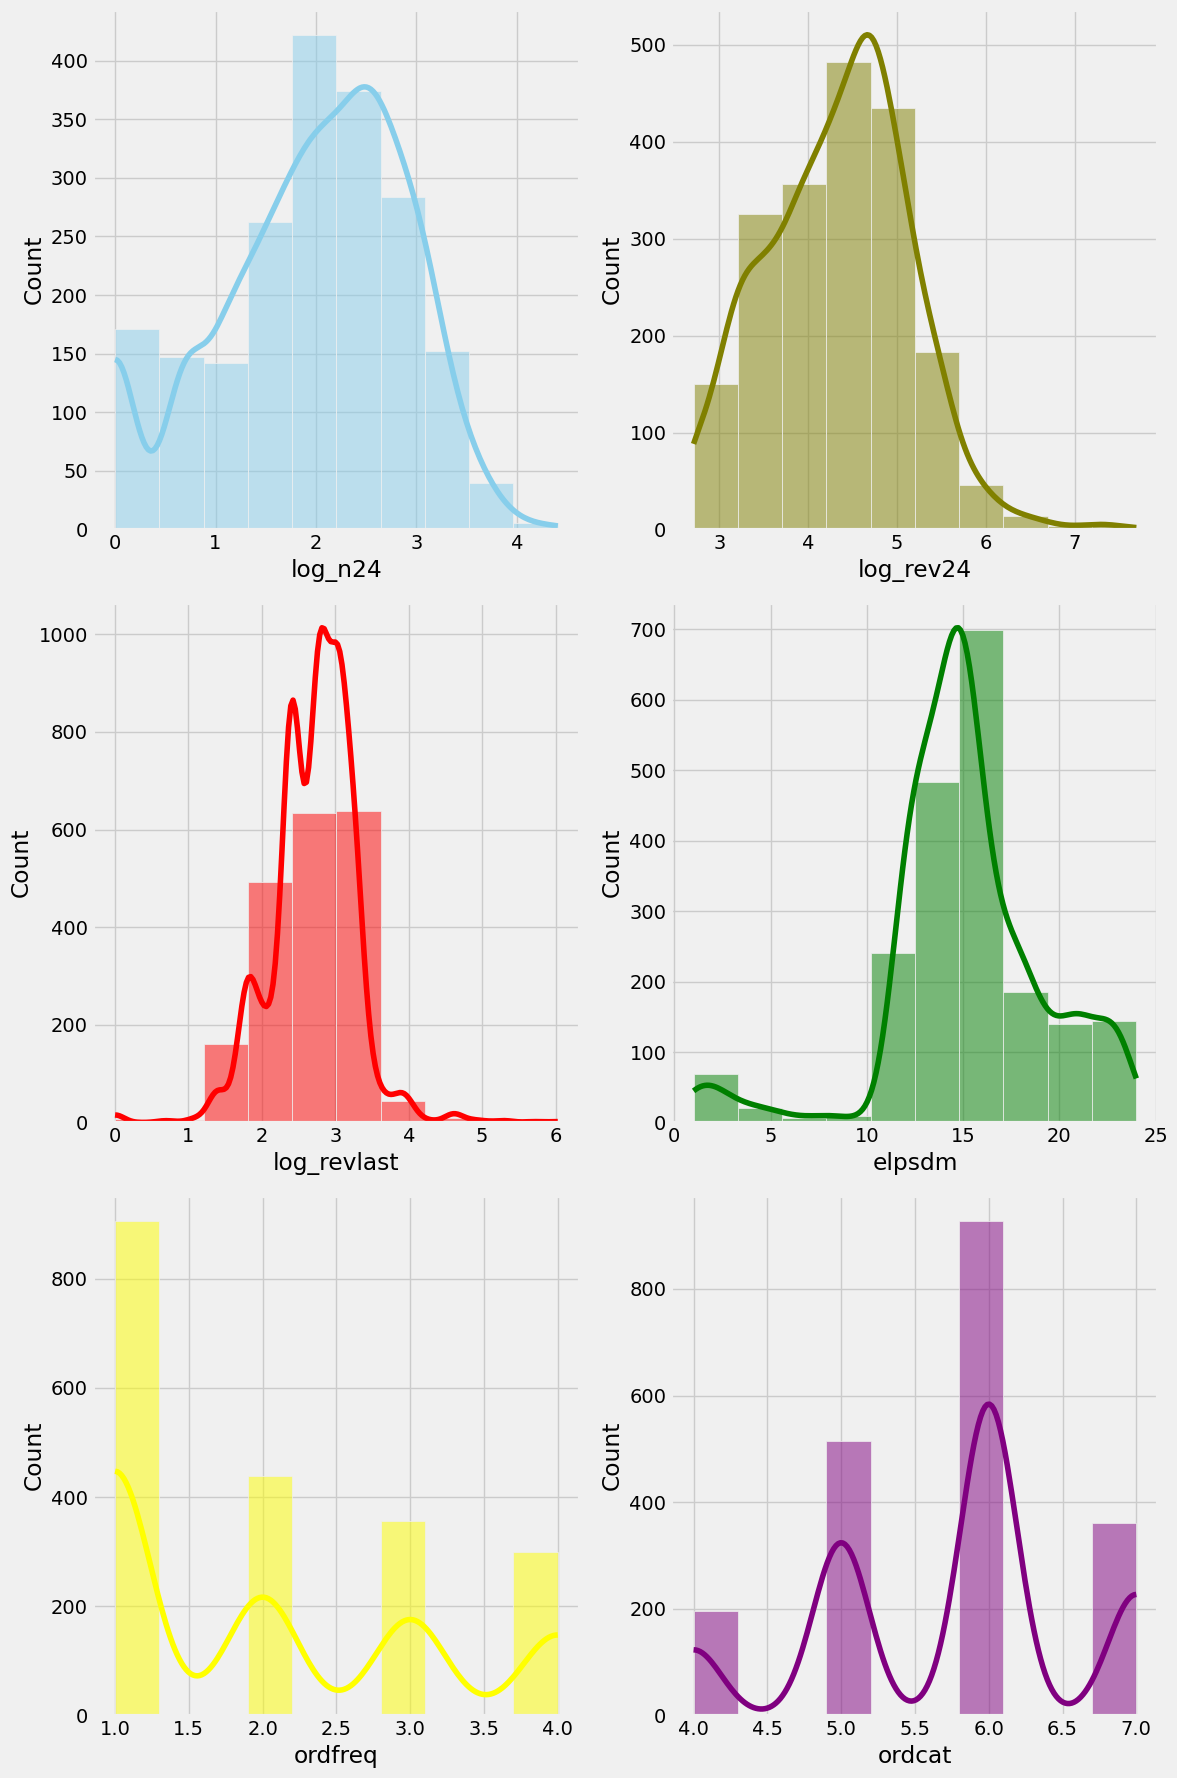

In [11]:
# Create a figure with subplots
f, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot a histogram with kernel density estimation for the 'log_n24' column
sns.histplot(data=df, x="log_n24", kde=True, color="skyblue", bins=10, ax=axs[0,0])

# Plot a histogram with kernel density estimation for the 'log_rev24' column
sns.histplot(data=df, x="log_rev24", kde=True, color="olive", bins=10, ax=axs[0,1])

# Plot a histogram with kernel density estimation for the 'log_revlast' column
sns.histplot(data=df, x="log_revlast", kde=True, color="red", bins=10, ax=axs[1,0])

# Plot a histogram with kernel density estimation for the 'elpsdm' column
sns.histplot(data=df, x="elpsdm", kde=True, color="green", bins=10, ax=axs[1,1])

# Plot a histogram with kernel density estimation for the 'ordfreq' column
sns.histplot(data=df, x="ordfreq", kde=True, color="yellow", bins=10, ax=axs[2,0])

# Plot a histogram with kernel density estimation for the 'ordcat' column
sns.histplot(data=df, x="ordcat", kde=True, color="purple", bins=10, ax=axs[2,1])

# Adjust the layout of the subplots
f.tight_layout()

# Save the figure as 'Plot2.png'
plt.savefig('Plot2.png')

# Show the plot
plt.show()


### Looking at post transformation data

## -----------------------------------------------------------

##### Variable transformation Observation

 1. transformed 3 variables n24 rev24 and revlast
 2. since revlast had zero as a value, could not use log transformation
 3. there were multiple alternative like using sqrt or boxcox tranformation or using log(x+1)
 4. I chose log(x+1) transformation to normalize the data.
 5. The resulting histograms show transformed variables that are close to normal distribution
## --------------------------------------------------------------

### Specify the target variable

In [12]:
df

,elpsdm,ordfreq,ordcat,response,log_n24,log_rev24,log_revlast
0,24,1,6,1,0.693147,3.401197,3.044522
1,24,1,6,0,3.218876,5.332719,3.044522
2,24,1,6,0,1.609438,3.951244,2.772589
3,24,1,6,0,2.397895,4.653960,2.772589
4,24,1,6,0,0.693147,3.465736,2.890372
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.484907,4.653960,3.044522
1996,1,2,6,0,3.583519,6.666957,1.791759
1997,1,1,7,0,1.945910,6.028279,4.615121
1998,1,1,7,0,1.609438,4.343805,3.258097


In [13]:
# Retrieve the values from the 'response' column and convert them to a NumPy array
y = df['response'].to_numpy()


array([1, 0, 0, ..., 0, 0, 0])

#### Encoding the target y

In [14]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to the 'y' array
y = le.fit_transform(y)

y

array([1, 0, 0, ..., 0, 0, 0])

### Splitting the data into train and test

In [15]:
X = df.copy()
X = X.drop('response', axis = 1)
print(X)

      elpsdm  ordfreq  ordcat   log_n24  log_rev24  log_revlast
0         24        1       6  0.693147   3.401197     3.044522
1         24        1       6  3.218876   5.332719     3.044522
2         24        1       6  1.609438   3.951244     2.772589
3         24        1       6  2.397895   4.653960     2.772589
4         24        1       6  0.693147   3.465736     2.890372
...      ...      ...     ...       ...        ...          ...
1995       1        2       6  2.484907   4.653960     3.044522
1996       1        2       6  3.583519   6.666957     1.791759
1997       1        1       7  1.945910   6.028279     4.615121
1998       1        1       7  1.609438   4.343805     3.258097
1999       1        1       6  3.526361   6.150603     3.465736

[2000 rows x 6 columns]


In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Print the training set
print("Training set:")
print(X_train)
print(y_train)

# Print the testing set
print("Testing set:")
print(X_test)
print(y_test)


Training set:
      elpsdm  ordfreq  ordcat   log_n24  log_rev24  log_revlast
650       16        1       6  1.609438   4.204693     3.044522
1104      15        2       6  2.197225   4.700480     2.772589
561       17        3       5  2.484907   4.682131     2.564949
643       16        1       6  0.693147   3.688879     3.044522
441       18        2       6  1.098612   3.295837     2.772589
...      ...      ...     ...       ...        ...          ...
1791      12        4       5  1.791759   4.007333     2.484907
1096      15        1       5  2.833213   4.934474     2.564949
1932       3        3       6  2.197225   4.828314     2.772589
235       20        1       6  0.000000   2.708050     2.772589
1061      15        1       5  2.890372   4.912655     2.397895

[1500 rows x 6 columns]
[0 0 0 ... 1 1 0]
Testing set:
      elpsdm  ordfreq  ordcat   log_n24  log_rev24  log_revlast
674       16        1       7  2.772589   5.783825     3.433987
1699      12        3       6  1.6

In [17]:
#check the shape of X_train and X_test

X_train.shape, X_test.shape

((1500, 6), (500, 6))

## Checking on continuous and non-binary categorical variables based on testing dataset

##### Histogram of non-binary variables -- n24, rev24, revlast, elpsdm, ordfreq, ordcat based on test data

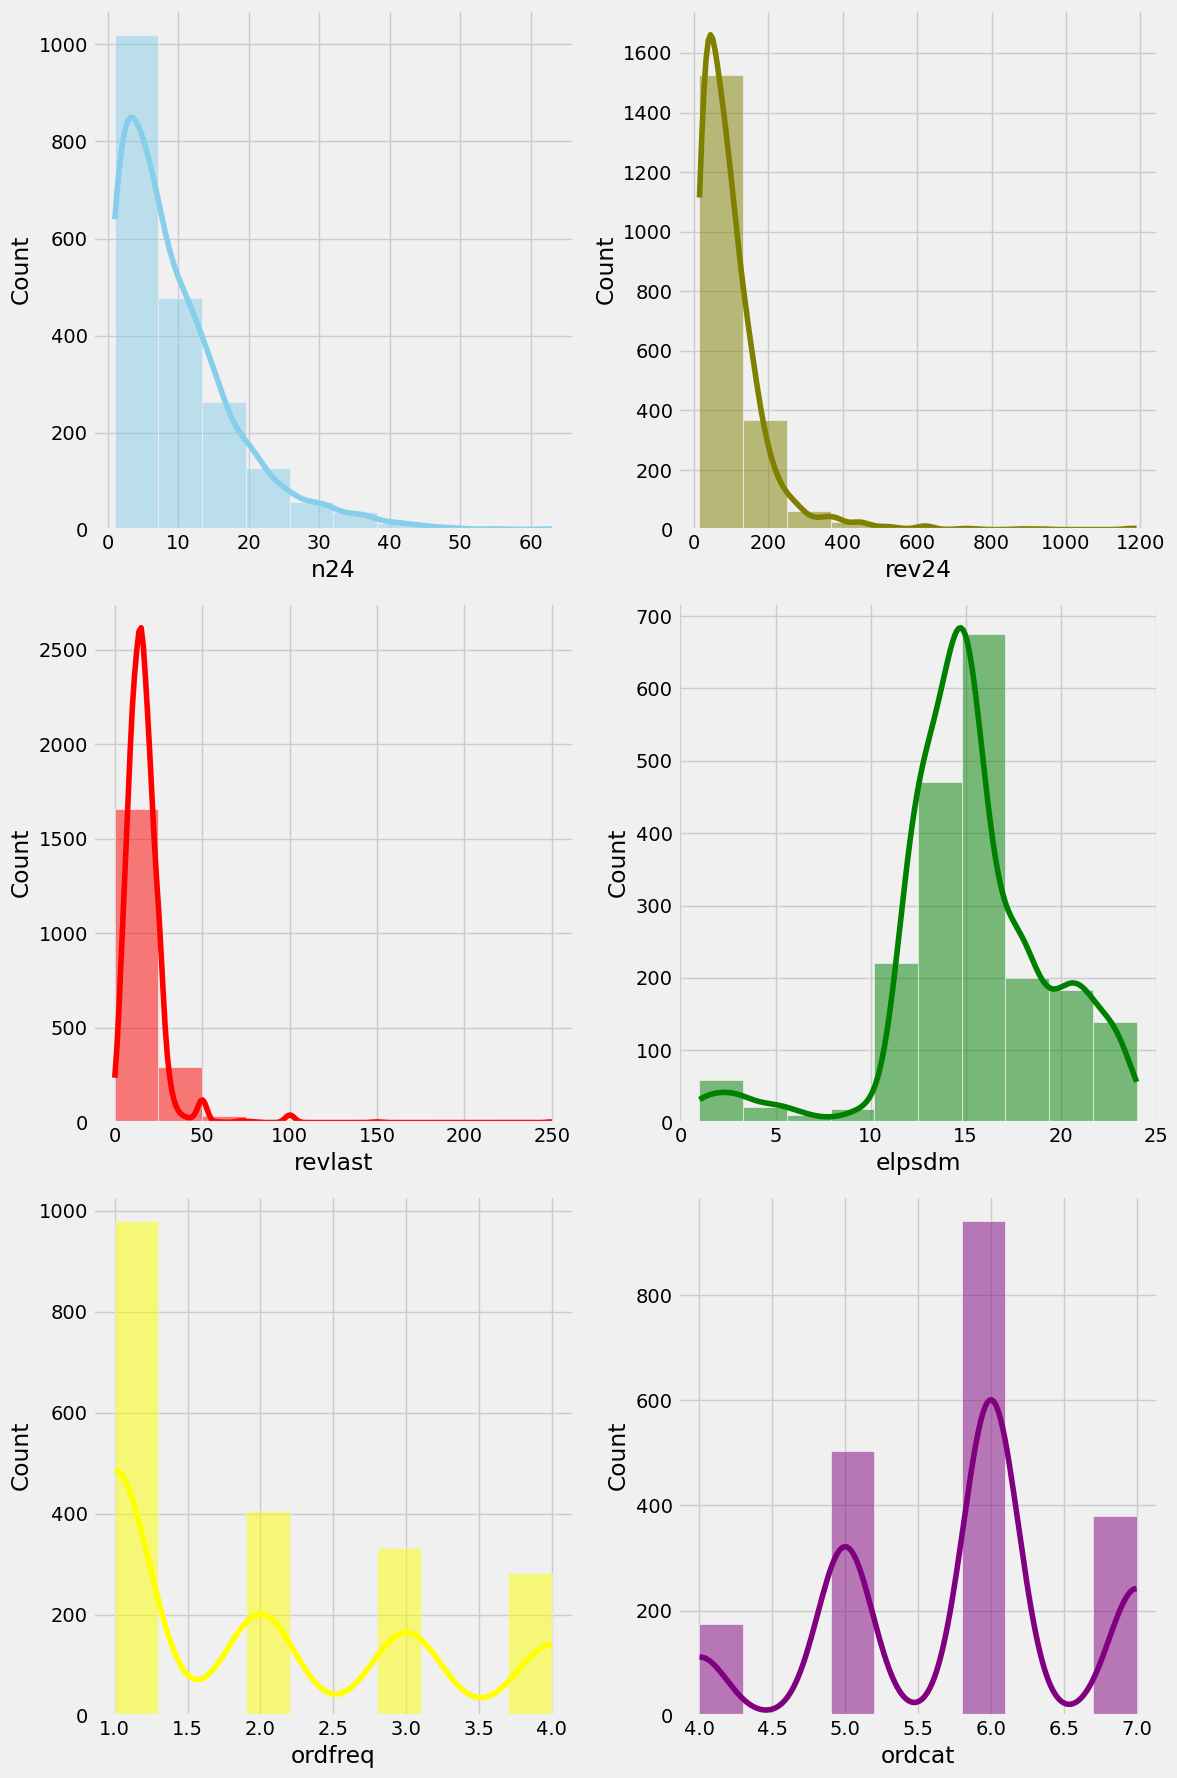

In [18]:
# Create a figure with subplots
f, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot a histogram with kernel density estimation for the 'n24' column in the test data
sns.histplot(data=dmtest, x="n24", kde=True, color="skyblue", bins=10, ax=axs[0,0])

# Plot a histogram with kernel density estimation for the 'rev24' column in the test data
sns.histplot(data=dmtest, x="rev24", kde=True, color="olive", bins=10, ax=axs[0,1])

# Plot a histogram with kernel density estimation for the 'revlast' column in the test data
sns.histplot(data=dmtest, x="revlast", kde=True, color="red", bins=10, ax=axs[1,0])

# Plot a histogram with kernel density estimation for the 'elpsdm' column in the test data
sns.histplot(data=dmtest, x="elpsdm", kde=True, color="green", bins=10, ax=axs[1,1])

# Plot a histogram with kernel density estimation for the 'ordfreq' column in the test data
sns.histplot(data=dmtest, x="ordfreq", kde=True, color="yellow", bins=10, ax=axs[2,0])

# Plot a histogram with kernel density estimation for the 'ordcat' column in the test data
sns.histplot(data=dmtest, x="ordcat", kde=True, color="purple", bins=10, ax=axs[2,1])

# Adjust the layout of the subplots
f.tight_layout()

# Save the figure as 'Plot3.png'
plt.savefig('Plot3.png')


In [19]:
# Create a copy of the test data
test_data = dmtest.copy()

# Apply logarithm transformation to the 'n24' column and add it as 'log_n24'
test_data['log_n24'] = np.log(dmtest['n24'])

# Apply logarithm transformation to the 'rev24' column and add it as 'log_rev24'
test_data['log_rev24'] = np.log(dmtest['rev24'])

# Apply logarithm transformation to the 'revlast' column, add 1 to the values, and add it as 'log_revlast'
test_data['log_revlast'] = np.log(dmtest['revlast'] + 1)

# Drop the original 'n24', 'rev24', 'revlast' columns from the test data
test_data = test_data.drop(['n24', 'rev24', 'revlast'], axis=1)


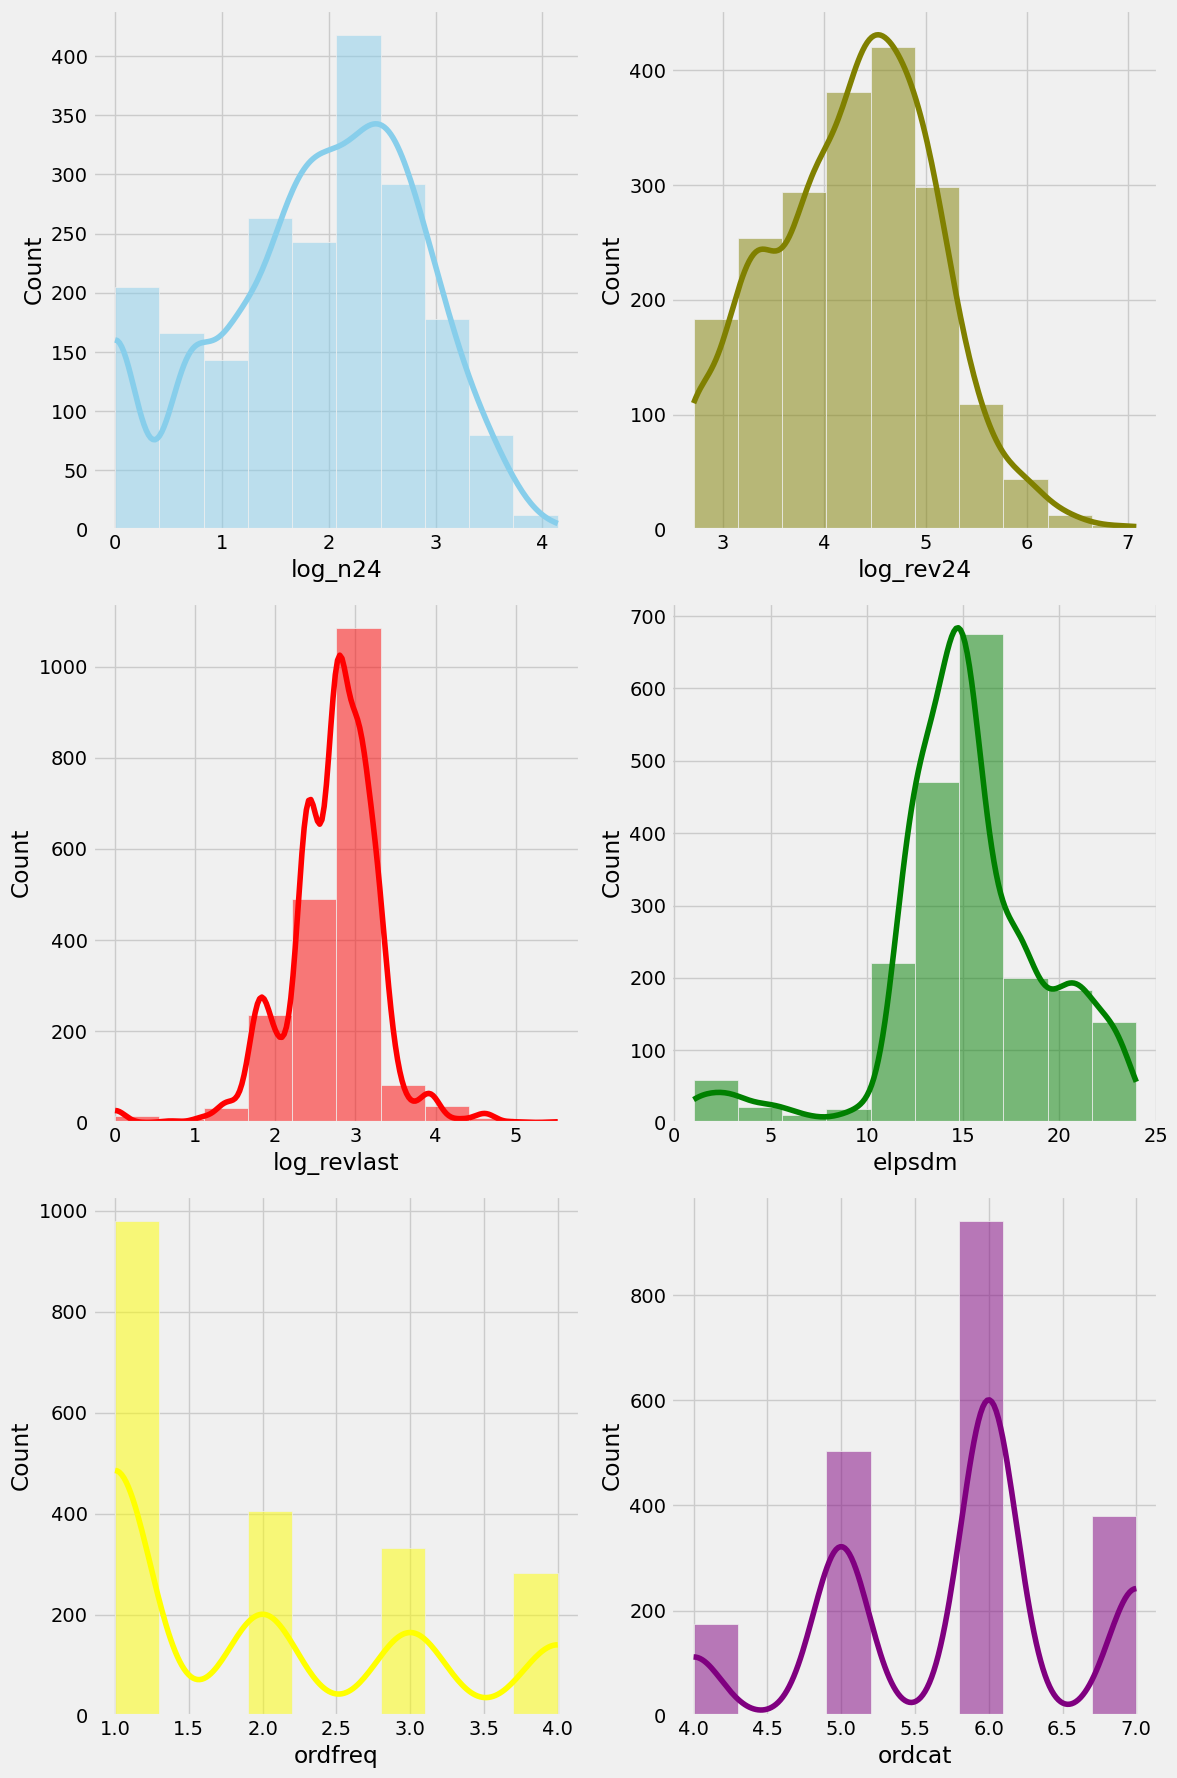

In [20]:
# Create a figure with subplots for the histograms
f, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot histogram of 'log_n24' column
sns.histplot(data=test_data, x="log_n24", kde=True, color="skyblue", bins=10, ax=axs[0, 0])

# Plot histogram of 'log_rev24' column
sns.histplot(data=test_data, x="log_rev24", kde=True, color="olive", bins=10, ax=axs[0, 1])

# Plot histogram of 'log_revlast' column
sns.histplot(data=test_data, x="log_revlast", kde=True, color="red", bins=10, ax=axs[1, 0])

# Plot histogram of 'elpsdm' column
sns.histplot(data=test_data, x="elpsdm", kde=True, color="green", bins=10, ax=axs[1, 1])

# Plot histogram of 'ordfreq' column
sns.histplot(data=test_data, x="ordfreq", kde=True, color="yellow", bins=10, ax=axs[2, 0])

# Plot histogram of 'ordcat' column
sns.histplot(data=test_data, x="ordcat", kde=True, color="purple", bins=10, ax=axs[2, 1])

# Adjust the layout of subplots
f.tight_layout()

# Save the figure as 'Plot4.png'
plt.savefig('Plot4.png')


# Generating a decision tree on the entire dataset, without any limitations on the depth of the tree.

### Building Decisions Trees

In [21]:
# Create a Decision Tree Classifier object with entropy as the criterion and set the random state
fullClassTree = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the classifier to the training data
fullClassTree.fit(X, y)

print('Decision Tree Classifier Created')


Decision Tree Classifier Created


### Plotting the decision tree

In [20]:
# This step takes a lot time, please uncomment the following code to replicate plotting the tree
fig = plt.figure(figsize = (20,20))
fCT_fig = plot_tree(decision_tree=fullClassTree, feature_names = df.columns, class_names = ['0', '1'],
                     filled = True , rounded = True)
fig.savefig("decistion_tree.png", dpi = 1920)

In [21]:
print(fullClassTree.tree_.max_depth)

26


# Lets focus on decision trees ﬁrst, and try to identify the best decision tree classiﬁer by pruning the tree at diﬀerent depths.

##### We are going to create a model and we will try various max_depths and check CV score for each depth. 
 We will look at the mean score and the Min and Max score. The scoring will be done based on accuracy.
##### =================================================================================================================
 We will run these models on X_train
 We have kept a test dataset aside to check the models with different max_depths and see how they perform on holdout data of our own.
##### ==================================================================================================================
 Why we chose to keep hold out data aside:

##### If we use the training set to find the tree with the lowest error among all the trees in the searched range, measuring accuracy on that same training data, then we will be overfitting the training data. If we use the validation set to measure accuracy, then, with the numerou trials, we will be overfitting the validation data! A solution is therefore to use cross-validation on the training set, and, after settling on the best tree, use that tree with the validation data to evaluate likely actual performance with new data. This will help detect and avoid possible overfitting. (excerpt from the book)



In [59]:
# Create a KFold object with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
print(kf)


KFold(n_splits=10, random_state=1, shuffle=True)


### We know that the max dept for a full grown tree is 26.
 We also know that a full grown tree is overfitting on the training data
 We are looking to identify the best tree depth and our our choice of metric is accuracy
 If we set max_depth too high, then the decision tree might simply overfit the training data without capturing useful patterns as we would like; this will cause testing error to increase. But if we set it too low, that is not good as well; then you might be giving the decision tree too little flexibility to capture the patterns and interactions in the training data. This will also cause the testing error to increase.
### Therefore we will try different values from 4 to 16

In [60]:
# Create an empty dictionary to store accuracy scores for different depths
dtree_accuracy_dic = {}

# Iterate over different depths from 4 to 15
for depth in range(4, 16):
    model001 = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)
    cvscore = model_selection.cross_val_score(model001, X_train, y_train, cv=kf, n_jobs=4, scoring='accuracy')
    cvscore_avg = cvscore.mean()
    rounded_cvscore_avg = round(cvscore_avg, 3)
    print('Depth of the tree:', depth, 'Avg Mean Score:', rounded_cvscore_avg)
    dtree_accuracy_dic[depth] = rounded_cvscore_avg

Depth of the tree: 4 Avg Mean Score: 0.701
Depth of the tree: 5 Avg Mean Score: 0.693
Depth of the tree: 6 Avg Mean Score: 0.685
Depth of the tree: 7 Avg Mean Score: 0.681
Depth of the tree: 8 Avg Mean Score: 0.684
Depth of the tree: 9 Avg Mean Score: 0.677
Depth of the tree: 10 Avg Mean Score: 0.674
Depth of the tree: 11 Avg Mean Score: 0.667
Depth of the tree: 12 Avg Mean Score: 0.656
Depth of the tree: 13 Avg Mean Score: 0.652
Depth of the tree: 14 Avg Mean Score: 0.634
Depth of the tree: 15 Avg Mean Score: 0.613


In [61]:
# Order the depth by accuracy
sorted_dtree_accuracy_dic = sorted(dtree_accuracy_dic.items(), key = lambda item: item[1], reverse = True)
print(sorted_dtree_accuracy_dic)

[(4, 0.701), (5, 0.693), (6, 0.685), (8, 0.684), (7, 0.681), (9, 0.677), (10, 0.674), (11, 0.667), (12, 0.656), (13, 0.652), (14, 0.634), (15, 0.613)]


###  Based on the above results we can see that best tree depth is 4 if the scoring metric is accuracy, and the three best values of tree-depth are 4, 5, and 6.
 In order to make sure that we chose the ideal set of max_depth we fit the above models on both train and test and capture their accuracy and plot them against different depth values to see what happenes when we keep increasing the max_depth

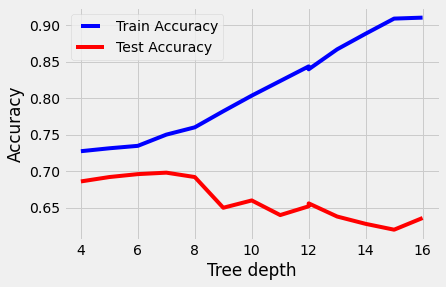

In [25]:
import numpy as np
from matplotlib.legend_handler import HandlerLine2D

# Define the maximum depths to explore
max_depths = np.linspace(4, 16, 16, endpoint=True).astype(int)

# Create empty lists to store the training and test accuracy results
train_results = []
test_results = []

# Iterate over different maximum depths
for max_depth in max_depths:
    model002 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    model002.fit(X_train, y_train)
    train_pred = model002.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_pred)
    train_results.append(accuracy_train)
    y_pred = model002.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    test_results.append(accuracy_test)

# Plot the training and test accuracy scores
line1, = plt.plot(max_depths, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()


<b> Observation 3.1 </b>

Now we can clearly observe that the accuracy for train keeps increasing and starts to plateau aobe 90% which is an indication of overfitting and for  test  the accuracy increases similarly to train until max_depth seven and then it just keeps dropping

<b> Observation 3.2 </b>

Below we showcase our top 3 max_depth model performance against the test data 

Since the goal of the marketing firm is to improve their performance by identifying and targeting profitable customers, also lower considerable printing and mailing costs, precision (proportion of positive predictions that were correct) is more important

Therefore as suggested the best max_depth is 6 per our test data

In [64]:
test_results = []

for max_depth in range(4, 7):
    model002 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
    model002.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    y_pred = model002.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'============================================== Confusion Matrix model004, max_depth =  {max_depth}  ====================================')
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print('Confusion Matrix:')
    print('-----------------')
    print('           Predicted')
    print('           0     1')
    print(f'Actual 0: {cm[0][0]:>3} {cm[0][1]:>3}')
    print(f'       1: {cm[1][0]:>3} {cm[1][1]:>3}')
    print('-----------------')
    print()



============================================== Confusion Matrix model004, max_depth =  4  ====================================
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       351
           1       0.43      0.16      0.23       149

    accuracy                           0.69       500
   macro avg       0.57      0.53      0.52       500
weighted avg       0.63      0.69      0.63       500

Confusion Matrix:
-----------------
           Predicted
           0     1
Actual 0: 319  32
       1: 125  24
-----------------

============================================== Confusion Matrix model004, max_depth =  5  ====================================
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       351
           1       0.45      0.15      0.23       149

    accuracy                           0.69       500
   macro avg       0.59      0.54      0.52       500
weighted avg    

# Next,lets consider Random Forests.

In [65]:
for i in range(4, 7):
    # Create a Random Forest model with specified max_depth
    rf_model001 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=i, random_state=1)
    
    # Perform 10-fold cross validation
    rf_cvscore = model_selection.cross_val_score(rf_model001, X_train, y_train, cv=kf, n_jobs=4, scoring='accuracy')
    
    # Print the average mean score for the current max_depth
    print('Depth of the tree:', i, 'Avg Mean Score:', round(rf_cvscore.mean(), 3))

Depth of the tree: 4 Avg Mean Score: 0.712
Depth of the tree: 5 Avg Mean Score: 0.709
Depth of the tree: 6 Avg Mean Score: 0.707


In [68]:
for max_depth in range(4, 7):
    model002 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth, random_state=1)
    model002.fit(X_train, y_train)

    # Print the confusion matrix and classification report
    print(f'============================================== Confusion Matrix model002, max_depth =  {max_depth}  ====================================')
    y_pred = model002.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the classification report
    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print("-----------------")
    print(f"           Predicted")
    print(f"           0     1")
    print(f'Actual 0: {cm[0][0]:>3} {cm[0][1]:>3}')
    print(f'       1: {cm[1][0]:>3} {cm[1][1]:>3}')
    print("-----------------\n")




============================================== Confusion Matrix model002, max_depth =  4  ====================================
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       351
           1       0.77      0.07      0.12       149

    accuracy                           0.72       500
   macro avg       0.74      0.53      0.48       500
weighted avg       0.73      0.72      0.62       500

Confusion Matrix:
-----------------
           Predicted
           0     1
Actual 0: 348   3
       1: 139  10
-----------------

============================================== Confusion Matrix model002, max_depth =  5  ====================================
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       351
           1       0.57      0.09      0.15       149

    accuracy                           0.71       500
   macro avg       0.64      0.53      0.49       500
weighted avg    

<b> Observation </b>
    
    
Based on the observations above we see:
    
    1. The best model with random forest is at max_depth 6
    2. Random forst models on max_depth 4, 5 and 6 have high precision score as compared to decision trees but the precision score is high because   of low false postives
    3. Therefore the true positives are captured better with decision trees rather than random forest
    4. The accuracy also doesn't improve that great from decision trees
    5. Now we want to check other tree depths to see if the random forest can perform better than the results that we have
    

# Lets repeat this experiment with 50 trees.

In [29]:
for i in range(4,7):
    rf_model002 = RandomForestClassifier(n_estimators=50,criterion = 'entropy',max_depth=i, random_state = 1)
    # Perform 10-fold cross validation 
    rf_cvscore = model_selection.cross_val_score(rf_model002, X_train, y_train, cv = kf, n_jobs = 4, scoring = 'accuracy')
    print('Depth of the tree:', i , 'Avg Mean Score :',round(rf_cvscore.mean(), 3))

Depth of the tree: 4 Avg Mean Score : 0.71
Depth of the tree: 5 Avg Mean Score : 0.711
Depth of the tree: 6 Avg Mean Score : 0.709


In [72]:
# Iterate over different max_depth values in Random Forest
for max_depth in range(4, 7):
    # Create and fit the Random Forest model
    model002 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=max_depth, random_state=1)
    model002.fit(X_train, y_train)
    
    # Generate predictions for the test set
    y_pred = model002.predict(X_test)
    
    # Print the confusion matrix and classification report
    print(f'============================================== Confusion Matrix model004, max_depth =  {max_depth}  ====================================')
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print the confusion matrix in a formatted manner
    print("Confusion Matrix:")
    print("---------------")
    print(f"        Predicted")
    print(f"        0    1")
    print(f'Actual 0: {cm[0][0]:>3} {cm[0][1]:>3}')
    print(f'       1: {cm[1][0]:>3} {cm[1][1]:>3}')
    print("---------------\n")
    
    # Print the classification report
    print(classification_report(y_test, y_pred))


============================================== Confusion Matrix model004, max_depth =  4  ====================================
Confusion Matrix:
---------------
        Predicted
        0    1
Actual 0: 347   4
       1: 143   6
---------------

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       351
           1       0.60      0.04      0.08       149

    accuracy                           0.71       500
   macro avg       0.65      0.51      0.45       500
weighted avg       0.68      0.71      0.60       500

============================================== Confusion Matrix model004, max_depth =  5  ====================================
Confusion Matrix:
---------------
        Predicted
        0    1
Actual 0: 345   6
       1: 139  10
---------------

              precision    recall  f1-score   support

           0       0.71      0.98      0.83       351
           1       0.62      0.07      0.12       149

    accuracy   

<b> Observation 5.1
    
    
Based on the observations above we see:
    
    1. The best model with random forest with 50 tree is at max_depth 6 again.
    2. Random forst models on max_depth 4, 5 and 6 have high precision score as compared to decision trees but the precision score is high because   of low false postives
    3. Therefore the true positives are captured better with decision trees rather than random forest
    4. The accuracy also doesn't improve that great from decision trees
    5. The models are better in terms of accuracy and precision but they are not better in terms of capturing the most number of customers as compared to decision trees
    
    

# Now lets consider k-nearest neighbor models. 

<b> Observation 5.1
    
    Distance based algorithm like KNN can get affected by the range of features and 
    Based on the data dictionary, the ordercat variable is a categorical varibale with 7 categories.
    In our data, we have only 4 unique categories
    Now since we are going to use KNN and we want to scale our data (numeric variables)
    We will create dummy variables for our ordercat variable
    Orderfreq may look like a categorical but don't get confused, the variable is showing the count of orders and there is supposed to be distance between 1,2,3 and 4
    

In [25]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame
X_new = df.copy()

# Remove the 'response' and 'ordcat' columns from the DataFrame
X_2 = X_new.drop(columns=['response', 'ordcat'])

print(X_2)


      elpsdm  ordfreq   log_n24  log_rev24  log_revlast
0         24        1  0.693147   3.401197     3.044522
1         24        1  3.218876   5.332719     3.044522
2         24        1  1.609438   3.951244     2.772589
3         24        1  2.397895   4.653960     2.772589
4         24        1  0.693147   3.465736     2.890372
...      ...      ...       ...        ...          ...
1995       1        2  2.484907   4.653960     3.044522
1996       1        2  3.583519   6.666957     1.791759
1997       1        1  1.945910   6.028279     4.615121
1998       1        1  1.609438   4.343805     3.258097
1999       1        1  3.526361   6.150603     3.465736

[2000 rows x 5 columns]


In [26]:
# Normalize the data using the normalize() function
X_2 = normalize(X_2)
print(X_2)

[[0.98117237 0.04088218 0.02833737 0.13904837 0.12446672]
 [0.95994765 0.03999782 0.12874801 0.21329712 0.12177426]
 [0.97744482 0.04072687 0.06554736 0.16092178 0.11291885]
 ...
 [0.1255643  0.1255643  0.24433685 0.75693658 0.57949438]
 [0.17131193 0.17131193 0.27571592 0.74414571 0.55815082]
 [0.12473089 0.12473089 0.4398461  0.76717017 0.43228433]]


In [73]:
# Define the column names for the DataFrame
col_names=['elpsdm' ,'ordfreq', 'log_n24', 'log_rev24', 'log_revlast']

# Create a DataFrame 'scaled_df' with the normalized data and column names
scaled_df = pd.DataFrame(X_2, columns=col_names)

# Generate descriptive statistics for the scaled data
scaled_stats = scaled_df.describe().T

# Print the descriptive statistics with transposed rows and columns
scaled_stats.T


,elpsdm,ordfreq,log_n24,log_rev24,log_revlast
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.899562,0.134096,0.127215,0.280849,0.172188
std,0.134932,0.090266,0.080193,0.109344,0.058139
min,0.114281,0.039998,0.000000,0.126674,0.000000
25%,0.902464,0.060568,0.077691,0.218493,0.138653
50%,0.929245,0.117304,0.121978,0.265092,0.164269
75%,0.952486,0.189265,0.165939,0.306315,0.193260
max,0.983281,0.591247,0.513756,0.904300,0.630837


In [74]:
scaled_df['ordcat'] = X_new['ordcat']

In [75]:
scaled_df

,elpsdm,ordfreq,log_n24,log_rev24,log_revlast,ordcat
0,0.981172,0.040882,0.028337,0.139048,0.124467,6
1,0.959948,0.039998,0.128748,0.213297,0.121774,6
2,0.977445,0.040727,0.065547,0.160922,0.112919,6
3,0.970066,0.040419,0.096922,0.188110,0.112066,6
4,0.981559,0.040898,0.028349,0.141743,0.118211,6
...,...,...,...,...,...,...
1995,0.154114,0.308228,0.382959,0.717241,0.469204,6
1996,0.123560,0.247120,0.442780,0.823770,0.221390,6
1997,0.125564,0.125564,0.244337,0.756937,0.579494,7
1998,0.171312,0.171312,0.275716,0.744146,0.558151,7


In [30]:
# Perform one-hot encoding on the scaled DataFrame using 'pd.get_dummies'
one_hot_encoded_data_knn = pd.get_dummies(scaled_df, columns=['ordcat'])
print(one_hot_encoded_data_knn)

# Assign the one-hot encoded data to variable X_Knn
X_Knn = one_hot_encoded_data_knn
print(X_Knn)


        elpsdm   ordfreq   log_n24  log_rev24  log_revlast  ordcat_4  \
0     0.981172  0.040882  0.028337   0.139048     0.124467         0   
1     0.959948  0.039998  0.128748   0.213297     0.121774         0   
2     0.977445  0.040727  0.065547   0.160922     0.112919         0   
3     0.970066  0.040419  0.096922   0.188110     0.112066         0   
4     0.981559  0.040898  0.028349   0.141743     0.118211         0   
...        ...       ...       ...        ...          ...       ...   
1995  0.154114  0.308228  0.382959   0.717241     0.469204         0   
1996  0.123560  0.247120  0.442780   0.823770     0.221390         0   
1997  0.125564  0.125564  0.244337   0.756937     0.579494         0   
1998  0.171312  0.171312  0.275716   0.744146     0.558151         0   
1999  0.124731  0.124731  0.439846   0.767170     0.432284         0   

      ordcat_5  ordcat_6  ordcat_7  
0            0         1         0  
1            0         1         0  
2            0         1

In [31]:
# Split the data into training and test sets using train_test_split
# X_Knn: input features
# y: target variable
# test_size: the proportion of the dataset to include in the test split
# random_state: the seed used by the random number generator for reproducibility
X_train_tra, X_test_tra, y_train_tra, y_test_tra = train_test_split(X_Knn, y, test_size=0.25, random_state=1)

# Print the training data and corresponding labels
print("Training Data:")
print(X_train_tra, y_train_tra)

# Print the test data and corresponding labels
print("Test Data:")
print(X_test_tra, y_test_tra)


        elpsdm   ordfreq   log_n24  log_rev24  log_revlast  ordcat_4  \
650   0.945210  0.059076  0.095079   0.248395     0.179857         0   
1104  0.923870  0.123183  0.135330   0.289509     0.170767         0   
561   0.932048  0.164479  0.136238   0.256704     0.140627         0   
643   0.955573  0.059723  0.041397   0.220312     0.181829         0   
441   0.965239  0.107249  0.058912   0.176737     0.148678         0   
...        ...       ...       ...        ...          ...       ...   
1791  0.881201  0.293734  0.131575   0.294272     0.182475         0   
1096  0.921521  0.061435  0.174058   0.303148     0.157577         0   
1932  0.408901  0.408901  0.299483   0.658101     0.377905         0   
235   0.980556  0.049028  0.000000   0.132770     0.135934         0   
1061  0.922770  0.061518  0.177810   0.302217     0.147514         0   

      ordcat_5  ordcat_6  ordcat_7  
650          0         1         0  
1104         0         1         0  
561          1         0

In [38]:
import random

# Set the seed for reproducibility
random.seed(1)

# Initialize an empty list to store all the scores
all_scores = []

# Loop through different values of n_neighbors
for n_neighbors in range(5, 30, 1):
    Knn_model001 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    cvscore = model_selection.cross_val_score(Knn_model001, X_train_tra, y_train_tra, cv=kf, n_jobs=4, scoring='accuracy')
    all_scores.append((n_neighbors, cvscore.mean()))

# Sort the scores in descending order based on the mean score
sorted_scores = sorted(all_scores, key=lambda x: x[1], reverse=True)
print(sorted_scores)


[(29, 0.688),
 (21, 0.6859999999999999),
 (27, 0.6853333333333332),
 (28, 0.6839999999999999),
 (23, 0.6833333333333333),
 (25, 0.6833333333333333),
 (10, 0.682),
 (18, 0.6819999999999999),
 (26, 0.6819999999999999),
 (17, 0.6813333333333332),
 (24, 0.6806666666666666),
 (11, 0.6793333333333333),
 (19, 0.6786666666666668),
 (22, 0.6786666666666668),
 (9, 0.6786666666666666),
 (12, 0.6779999999999999),
 (13, 0.6773333333333333),
 (14, 0.6773333333333332),
 (20, 0.6766666666666667),
 (16, 0.676),
 (15, 0.674),
 (8, 0.6733333333333335),
 (7, 0.666),
 (5, 0.6613333333333333),
 (6, 0.6573333333333333)]

In [77]:
test_results = []

# Loop through different values of n_neighbors in descending order
for n in (29, 28, 27):
    # Create a KNN model with the specified number of neighbors and distance-based weighting
    knn_model002 = KNeighborsClassifier(n_neighbors=n, weights='distance')
    
    # Fit the KNN model on the training data
    knn_model002.fit(X_train_tra, y_train_tra)
    
    # Print the confusion matrix and classification report
    print(f'============================================== Confusion Matrix model002, k = {n}  ====================================')
    
    # Generate predictions for the test set
    y_pred = knn_model002.predict(X_test_tra)
    
    # Print the classification report
    print(classification_report(y_test_tra, y_pred))
    
    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test_tra, y_pred)
    print("Confusion Matrix:")
    print("-----------------")
    print("           Predicted")
    print("           0     1")
    print(f'Actual 0: {cm[0][0]:>3} {cm[0][1]:>3}')
    print(f'       1: {cm[1][0]:>3} {cm[1][1]:>3}')
    print("-----------------\n")


============================================== Confusion Matrix model002, k = 29  ====================================
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       351
           1       0.48      0.14      0.22       149

    accuracy                           0.70       500
   macro avg       0.60      0.54      0.52       500
weighted avg       0.65      0.70      0.64       500

Confusion Matrix:
-----------------
           Predicted
           0     1
Actual 0: 328  23
       1: 128  21
-----------------

============================================== Confusion Matrix model002, k = 28  ====================================
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       351
           1       0.47      0.13      0.20       149

    accuracy                           0.70       500
   macro avg       0.60      0.53      0.51       500
weighted avg       0.65      0.7

Text(0, 0.5, 'Mean Error')

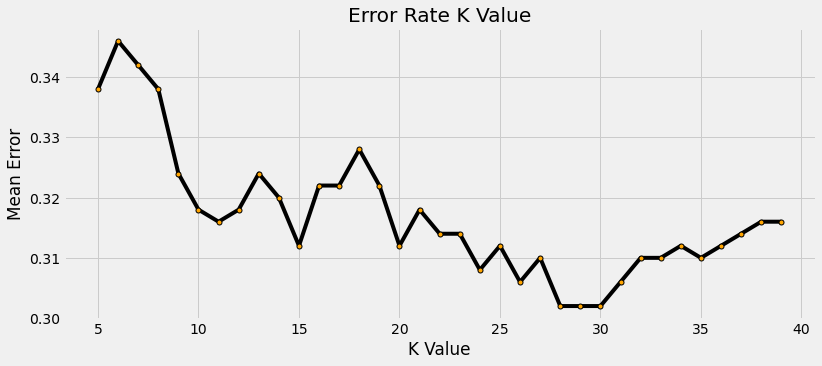

In [40]:
error = []
# Calculating the error rate for K-values between 1 and 30
for i in range(5, 40):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(X_train_tra, y_train_tra)
    y_pred = knn.predict(X_test_tra)
    error.append(np.mean(y_pred != y_test_tra))
    
plt.figure(figsize=(12, 5))
plt.plot(range(5, 40), error, color='black', marker='.',
        markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<b> Observation 6.1
    
    
Based on the observations above we see:
    
    1. K = 29 seems to be the best value and the accuracy associated with it is 70%
    2. The precision and accuracy is similar to decision tree
    3. 29,27,28 are the thre best values of k, we can also see this in the above Mean error vs K-value chart.

# Next we Develop a logistic regression model using 10-fold cross validation.


In [41]:
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [42]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [43]:

model = LogisticRegression(random_state=1, n_jobs = 4)

cvscore = model_selection.cross_val_score(model, X_train_tra, y_train_tra, cv = kf, n_jobs = 4, scoring = 'accuracy')

print('Avg Mean Score :' ,round(cvscore.mean(), 3))

Avg Mean Score : 0.711


In [44]:
model.fit(X_train_tra, y_train_tra)
logit_reg_pred = model.predict(X_test_tra)
logit_reg_proba = model.predict_proba(X_test_tra)
logit_result = pd.DataFrame({'actual': y_test_tra,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred})
print(logit_result)


     actual      p(0)      p(1)  predicted
0         0  0.800367  0.199633          0
1         1  0.668438  0.331562          0
2         0  0.749981  0.250019          0
3         0  0.771627  0.228373          0
4         1  0.567274  0.432726          0
..      ...       ...       ...        ...
495       0  0.727611  0.272389          0
496       1  0.795923  0.204077          0
497       0  0.691483  0.308517          0
498       0  0.757146  0.242854          0
499       1  0.751382  0.248618          0

[500 rows x 4 columns]


In [45]:
# validation confusion matrix 
classificationSummary(y_test_tra, logit_reg_pred)

Confusion Matrix (Accuracy 0.7020)

       Prediction
Actual   0   1
     0 346   5
     1 144   5


###  The associated accuracy post cv is 70.2%

# Now we Develop a logistic regression model on the entire training dataset.

## Method 1

In [46]:
# Create a copy of data frame for logistic regression
X_log  = X_Knn.copy()
lr = LogisticRegression(random_state = 1, n_jobs = 4)
lr_model1 = lr.fit(X_log, y)

In [47]:
lr_model1.classes_

array([0, 1])

In [48]:
lr_model1.intercept_

array([-0.84712892])

In [49]:
pd.DataFrame(list(zip(X_log.columns, np.transpose(lr_model1.coef_))))

,0,1
0,elpsdm,[-0.3490852891078995]
1,ordfreq,[1.9129477374024704]
2,log_n24,[0.553262729424759]
3,log_rev24,[0.051476392854816554]
4,log_revlast,[-0.21690907899743375]
5,ordcat_4,[0.48437389998340574]
6,ordcat_5,[0.04761884007435013]
7,ordcat_6,[-0.07971275172664175]
8,ordcat_7,[-0.4522756825275433]


## Method 2

In [50]:
X_log = sm.add_constant(X_log)

In [51]:
logit_reg = sm.Logit(y, X_log)
logit_result = logit_reg.fit()
print(logit_result.summary2())

Optimization terminated successfully.
         Current function value: 0.583422
         Iterations 5
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.034     
Dependent Variable:    y                   AIC:                 2351.6866 
Date:                  2022-10-10 11:56    BIC:                 2402.0947 
No. Observations:      2000                Log-Likelihood:      -1166.8   
Df Model:              8                   LL-Null:             -1207.9   
Df Residuals:          1991                LLR p-value:         1.8937e-14
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
             Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
--------------------------------------------------------------------------
const       -0.6518 4428517.

<b> Observation 8.1 </b>

Based on the results using method 1, we could get the following logistic regression model: 

$$ response = -0.847 - 0.349 * elpsdm + 1.913 * ordfreq + 0.553 * log\_n24 + 0.051 * log\_rev24 - 0.217 * log\_revlast + 0.484 * ordcat4 - 0.048 * ordcat5 - 0.080 * ordcat6 - 0.452 * ordcat7 $$

Based on the results using method 2, we could get the following logistic regression model: 

$$ response = -0.652 - 0.383 * elpsdm + 3.004 * ordfreq + 1.765 * log\_n24 -1.097 * log\_rev24 - 0.300 * log\_revlast + 0.178 * ordcat4 - 0.153 * ordcat5 - 0.169 * ordcat6 - 0.507 * ordcat7 $$

# Using the four best models identiﬁed in each category (decision tree, random forest, k-nearest neighbor, logistic regression), we perform an evaluation with 10-fold cross-validation.

In [22]:
# Create an empty list to store models for group A
modelsA = []

# Create an empty list to store models for group B
modelsB = []

# Create a Decision Tree model with specified parameters
model_df = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

# Create a Random Forest model with specified parameters
model_rf = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=6, random_state=1)

# Create a K-Nearest Neighbors model with specified parameters
Knn_model001 = KNeighborsClassifier(n_neighbors=29, weights='distance')

# Create a Logistic Regression model with specified parameters
logit_reg = LogisticRegression(random_state=1, n_jobs=4)

# Append the Decision Tree model to the lists'
modelsA.append(('DT', model_df))

modelsA.append(('RF', model_rf))

modelsB.append(('KN', Knn_model001))

modelsB.append(('LR', logit_reg))


### Evaluate all the models in turn using accuracy 

10-fold cross-validation 

In [32]:
metric = 'accuracy'
resultsA1 = []
mIDsA1 = []

# Evaluate models from group A
for mID, mdl in modelsA:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train, y_train, cv=kf, scoring=metric)
    resultsA1.append(cvres)
    mIDsA1.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

resultsA2 = []
mIDsA2 = []

# Evaluate models from group B
for mID, mdl in modelsB:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_tra, y_train_tra, cv=kf, scoring=metric)
    resultsA2.append(cvres)
    mIDsA2.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from both groups
resultsA1.extend(resultsA2)


DT: 0.704000 (0.018427)
RF: 0.710667 (0.008537)
KN: 0.692667 (0.021177)
LR: 0.711333 (0.010770)


### Review performance of all methods via a box plot

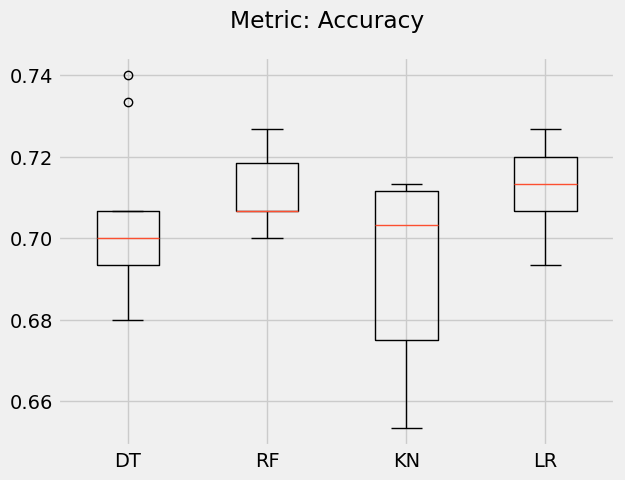

In [33]:
fig = plt.figure()
fig.suptitle('Metric: Accuracy')
ax = fig.add_subplot(1, 1, 1)

# Create a boxplot of the accuracy results
plt.boxplot(resultsA1)

# Set the x-axis labels
ax.set_xticklabels(['DT', 'RF', 'KN', 'LR'])

# Save the plot as an image
plt.savefig('Plot_accuracy.png')

# Display the plot
plt.show()


### Evaluate all the models using ROC

In [34]:
metric = 'roc_auc'
resultsR1 = []
mIDsR1 = []

# Calculate the roc_auc scores for models in group A
for mID, mdl in modelsA:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train, y_train, cv=kf, scoring=metric)
    resultsR1.append(cvres)
    mIDsR1.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

resultsR2 = []
mIDsR2 = []

# Calculate the roc_auc scores for models in group B
for mID, mdl in modelsB:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_tra, y_train_tra, cv=kf, scoring=metric)
    resultsR2.append(cvres)
    mIDsR2.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

resultsR1.extend(resultsR2)


DT: 0.584482 (0.055722)
RF: 0.603082 (0.050791)
KN: 0.578291 (0.069983)
LR: 0.616440 (0.063011)


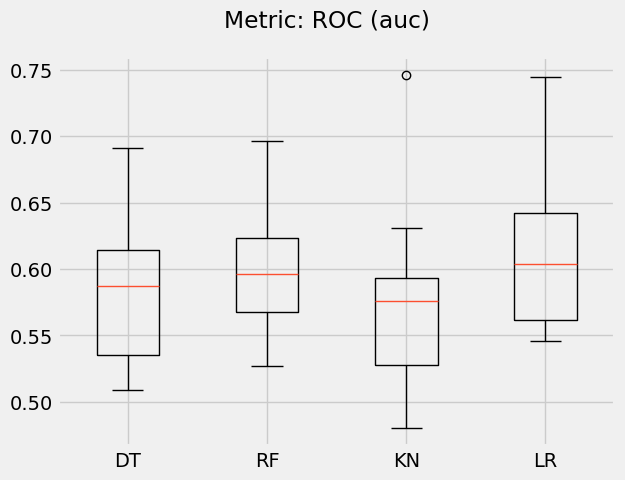

In [35]:
# Create a new figure
fig = plt.figure()
# Set the title of the figure
fig.suptitle('Metric: ROC (auc)')
# Add a subplot to the figure
ax = fig.add_subplot(1, 1, 1)
# Create a boxplot of the results
plt.boxplot(resultsR1)
# Set the x-axis tick labels
ax.set_xticklabels(['DT', 'RF', 'KN', 'LR'])
# Save the figure
plt.savefig('Plot_roc_auc.png')
# Display the plot
plt.show()


### Evaluate all the models in turn using precision

In [36]:
# Define the metric as precision
metric = 'precision'

# Initialize lists to store results
resultsP1 = []
mIDsP1 = []

# Calculate precision scores for models in group A
for mID, mdl in modelsA:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train, y_train, cv=kf, scoring=metric)
    
    # Store the results and model IDs
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of precision scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize additional lists for results and model IDs in group B
resultsP2 = []
mIDsP2 = []

# Calculate precision scores for models in group B
for mID, mdl in modelsB:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_tra, y_train_tra, cv=kf, scoring=metric)
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from both groups
resultsP1.extend(resultsP2)


DT: 0.384634 (0.177951)
RF: 0.509246 (0.122775)
KN: 0.412208 (0.094616)
LR: 0.641667 (0.263655)


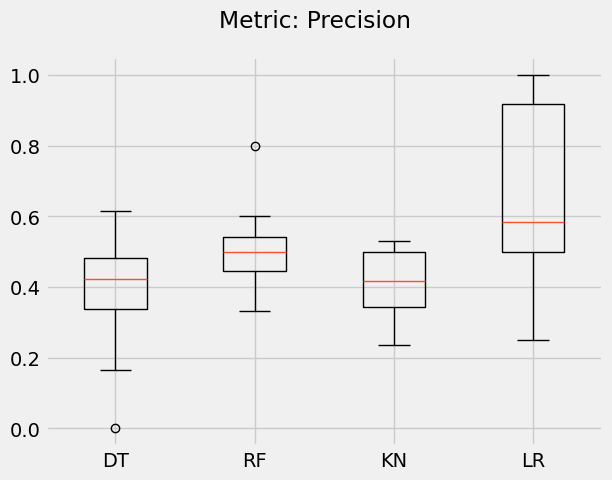

In [37]:
fig = plt.figure()
fig.suptitle('Metric: Precision')
ax = fig.add_subplot(1,1,1)
plt.boxplot(resultsP1)
ax.set_xticklabels(['DT', 'RF', 'KN', 'LR'])
plt.savefig('Plot_precision.png')
plt.show()

### Evaluate all models using recall

In [38]:
# Define the metric as recall
metric = 'recall'

# Initialize lists to store results
resultsRe1 = []
mIDsRe1 = []

# Calculate recall scores for models in group A
for mID, mdl in modelsA:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train, y_train, cv=kf, scoring=metric)
    
    # Store the results and model IDs
    resultsRe1.append(cvres)
    mIDsRe1.append(mID)
    
    # Print the mean and standard deviation of recall scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize additional lists for results and model IDs in group B
resultsRe2 = []
mIDsRe2 = []

# Calculate recall scores for models in group B
for mID, mdl in modelsB:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_tra, y_train_tra, cv=kf, scoring=metric)
    resultsRe2.append(cvres)
    mIDsRe2.append(mID)
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from both groups
resultsRe1.extend(resultsRe2)


DT: 0.112632 (0.079271)
RF: 0.082664 (0.025441)
KN: 0.130920 (0.035238)
LR: 0.036839 (0.015448)


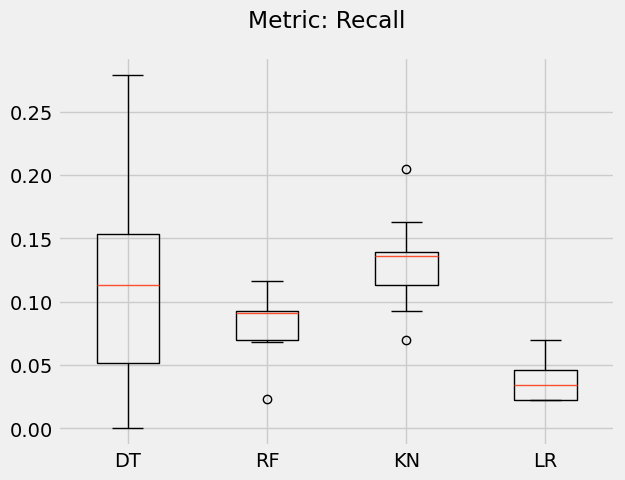

In [39]:
fig = plt.figure()
fig.suptitle('Metric: Recall')
ax = fig.add_subplot(1,1,1)
plt.boxplot(resultsRe1)
ax.set_xticklabels(['DT', 'RF', 'KN', 'LR'])
plt.savefig('Plot_recall.png')
plt.show()

In [40]:
# Define the metric as f1
metric = 'f1'

# Initialize lists to store results
resultsf1 = []
mIDsf1 = []

# Calculate f1 scores for models in group A
for mID, mdl in modelsA:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train, y_train, cv=kf, scoring=metric)
    
    # Store the results and model IDs
    resultsf1.append(cvres)
    mIDsf1.append(mID)
    
    # Print the mean and standard deviation of f1 scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize additional lists for results and model IDs in group B
resultsf2 = []
mIDsf2 = []

# Calculate f1 scores for models in group B
for mID, mdl in modelsB:
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_tra, y_train_tra, cv=kf, scoring=metric)  
    resultsf2.append(cvres)
    mIDsf2.append(mID)  
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from both groups
resultsf1.extend(resultsf2)


DT: 0.170674 (0.109823)
RF: 0.140909 (0.040644)
KN: 0.197459 (0.050064)
LR: 0.068293 (0.026662)


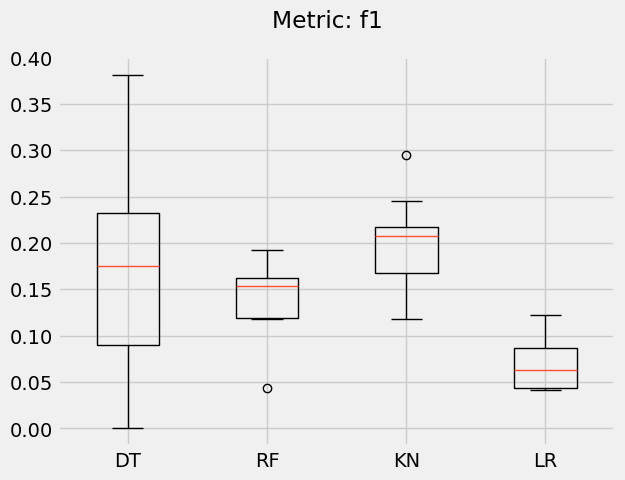

In [41]:
fig = plt.figure()
fig.suptitle('Metric: f1')
ax = fig.add_subplot(1,1,1)
plt.boxplot(resultsf1)
ax.set_xticklabels(['DT', 'RF', 'KN', 'LR'])
plt.savefig('Plot_f1.png')
plt.show()

### Based on different evaluation metric different model comes up

According to Accuracy metric, RF and LR are almost equal
According to Roc metric, LR tops and the second best is RF
According to Precision metric, LR tops and the second best is RF
According to Recall and F1 metric, Knn performs the best

Overall, we would suggest that logistics regression has been the best model for our case. As we would prefer better Accuracy,Precision and AUC over recall

# Now we use the entire dataset to develop a ﬁnal version of the recommended model for testing.

In [63]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [64]:
# Create a Logistic Regression model
model = LogisticRegression(random_state=1, n_jobs=4)

# Perform cross-validation and calculate the average accuracy score
cvscore = model_selection.cross_val_score(model, X_log, y, cv=kf, n_jobs=4, scoring='accuracy')

print('Avg Mean Score:', round(cvscore.mean(), 3))


Avg Mean Score : 0.704


In [65]:
# Fit the Logistic Regression model to the data
model.fit(X_log, y)

# Print the intercept
print('Intercept:', model.intercept_[0])

# Print the coefficients
coefficients = pd.DataFrame({'coeff': model.coef_[0]}, index=X_log.columns).transpose()
print(coefficients)

# Calculate and print the AIC score
aic_score = AIC_score(y, model.predict(X_log), df=len(X_train.columns))
print('AIC:', aic_score)


intercept  -0.8467080669173584
          const    elpsdm   ordfreq   log_n24  log_rev24  log_revlast  \
coeff  0.000672 -0.349965  1.913271  0.552678   0.050216    -0.217571   

       ordcat_4  ordcat_5  ordcat_6  ordcat_7  
coeff  0.484422  0.047683 -0.079474 -0.451959  
AIC 3203.633746750725


In [66]:
# Generate predictions and probabilities using the Logistic Regression model
logit_reg_pred = model.predict(X_log)
logit_reg_proba = model.predict_proba(X_log)

# Create a DataFrame to display the results
logit_result = pd.DataFrame({'actual': y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred})
print(logit_result)

# Calculate and print the Confusion Matrix on train
classificationSummary(y, model.predict(X_log))


      actual      p(0)      p(1)  predicted
0          1  0.767653  0.232347          0
1          0  0.755758  0.244242          0
2          0  0.763131  0.236869          0
3          0  0.759335  0.240665          0
4          0  0.767403  0.232597          0
...      ...       ...       ...        ...
1995       0  0.560733  0.439267          0
1996       0  0.564152  0.435848          0
1997       0  0.741683  0.258317          0
1998       0  0.723496  0.276504          0
1999       0  0.632499  0.367501          0

[2000 rows x 4 columns]
Confusion Matrix (Accuracy 0.7115)

       Prediction
Actual    0    1
     0 1399   17
     1  560   24


### Accuracy on the final selected model on train is 71.15%

# Read the ﬁle dmtest.csv and make predictions (using the ﬁnal model) on which customers are likely to respond, and which are not.

In [67]:
test_data

,id,elpsdm,ordfreq,ordcat,log_n24,log_rev24,log_revlast
0,5001,24,1,6,1.609438,5.225747,2.944439
1,5002,24,1,6,0.693147,3.401197,2.772589
2,5003,24,1,7,3.178054,5.891644,3.433987
3,5004,24,1,6,1.386294,3.713572,2.772589
4,5005,24,1,6,1.609438,4.077537,2.944439
...,...,...,...,...,...,...,...
1995,6996,1,1,7,2.197225,5.105945,0.000000
1996,6997,1,3,6,2.397895,5.003946,2.772589
1997,6998,1,2,5,2.890372,5.081404,2.639057
1998,6999,1,4,7,3.258097,6.056784,3.258097


In [68]:
# Remove unnecessary columns from the test data
test = test_data.drop(columns=['id', 'ordcat'])
print(test)

# Normalize the test data
test = normalize(test)
print(test)

# Create a DataFrame to store the scaled values
col_names = ['elpsdm', 'ordfreq', 'log_n24', 'log_rev24', 'log_revlast']
scaled_df = pd.DataFrame(test, columns=col_names)
scaled_df.describe().T

# Add the 'ordcat' column back to the scaled DataFrame
scaled_df['ordcat'] = dmtest['ordcat']

# Perform one-hot encoding on the scaled DataFrame
one_hot_encoded_data = pd.get_dummies(scaled_df, columns=['ordcat'])
print(one_hot_encoded_data)
test = one_hot_encoded_data.copy()
print(test)


      elpsdm  ordfreq   log_n24  log_rev24  log_revlast
0         24        1  1.609438   5.225747     2.944439
1         24        1  0.693147   3.401197     2.772589
2         24        1  3.178054   5.891644     3.433987
3         24        1  1.386294   3.713572     2.772589
4         24        1  1.609438   4.077537     2.944439
...      ...      ...       ...        ...          ...
1995       1        1  2.197225   5.105945     0.000000
1996       1        3  2.397895   5.003946     2.772589
1997       1        2  2.890372   5.081404     2.639057
1998       1        4  3.258097   6.056784     3.258097
1999       1        1  2.197225   4.828314     0.000000

[2000 rows x 5 columns]
[[0.96732646 0.04030527 0.06486883 0.21062513 0.11867641]
 [0.98247199 0.04093633 0.0283749  0.13923255 0.11349962]
 [0.95345976 0.03972749 0.1262561  0.23406024 0.13642369]
 ...
 [0.14721883 0.29443766 0.42551714 0.7480784  0.38851893]
 [0.11553553 0.46214211 0.3764259  0.69977374 0.3764259 ]
 [0.1821

In [69]:
test = sm.add_constant(test)
print(test)


      const    elpsdm   ordfreq   log_n24  log_rev24  log_revlast  ordcat_4  \
0       1.0  0.967326  0.040305  0.064869   0.210625     0.118676         0   
1       1.0  0.982472  0.040936  0.028375   0.139233     0.113500         0   
2       1.0  0.953460  0.039727  0.126256   0.234060     0.136424         0   
3       1.0  0.979470  0.040811  0.056576   0.151555     0.113153         0   
4       1.0  0.975830  0.040660  0.065439   0.165791     0.119720         0   
...     ...       ...       ...       ...        ...          ...       ...   
1995    1.0  0.174346  0.174346  0.383077   0.890201     0.000000         0   
1996    1.0  0.143626  0.430879  0.344401   0.718698     0.398216         0   
1997    1.0  0.147219  0.294438  0.425517   0.748078     0.388519         0   
1998    1.0  0.115536  0.462142  0.376426   0.699774     0.376426         0   
1999    1.0  0.182148  0.182148  0.400221   0.879470     0.000000         0   

      ordcat_5  ordcat_6  ordcat_7  
0            0

In [70]:
model.fit(X_log, y)

# Make predictions on the test data
predictions = model.predict(test)

# Print the test data with the predictions
print(test)



      const    elpsdm   ordfreq   log_n24  log_rev24  log_revlast  ordcat_4  \
0       1.0  0.967326  0.040305  0.064869   0.210625     0.118676         0   
1       1.0  0.982472  0.040936  0.028375   0.139233     0.113500         0   
2       1.0  0.953460  0.039727  0.126256   0.234060     0.136424         0   
3       1.0  0.979470  0.040811  0.056576   0.151555     0.113153         0   
4       1.0  0.975830  0.040660  0.065439   0.165791     0.119720         0   
...     ...       ...       ...       ...        ...          ...       ...   
1995    1.0  0.174346  0.174346  0.383077   0.890201     0.000000         0   
1996    1.0  0.143626  0.430879  0.344401   0.718698     0.398216         0   
1997    1.0  0.147219  0.294438  0.425517   0.748078     0.388519         0   
1998    1.0  0.115536  0.462142  0.376426   0.699774     0.376426         0   
1999    1.0  0.182148  0.182148  0.400221   0.879470     0.000000         0   

      ordcat_5  ordcat_6  ordcat_7  
0            0

In [71]:
dmtest['response_predicted'] = predictions

In [72]:
dmtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null   int64  
 1   n24                 2000 non-null   int64  
 2   rev24               2000 non-null   float64
 3   revlast             2000 non-null   int64  
 4   elpsdm              2000 non-null   int64  
 5   ordfreq             2000 non-null   int64  
 6   ordcat              2000 non-null   int64  
 7   response_predicted  2000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 125.1 KB


In [73]:
dmtest

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response_predicted
0,5001,5,186.0,18,24,1,6,0
1,5002,2,30.0,15,24,1,6,0
2,5003,24,362.0,30,24,1,7,0
3,5004,4,41.0,15,24,1,6,0
4,5005,5,59.0,18,24,1,6,0
...,...,...,...,...,...,...,...,...
1995,6996,9,165.0,0,1,1,7,0
1996,6997,11,149.0,15,1,3,6,0
1997,6998,18,161.0,13,1,2,5,0
1998,6999,26,427.0,25,1,4,7,0


In [74]:
test.to_csv('dmtest.csv')

## If we need to focus on lapsing customers, I will split the training datasets into two parts by if the customer is lapsing or not, and use cross-validation to double check the accuracy of the model.

In [42]:
# Filter the DataFrame for train_data_new1 where elpsdm is between 13 and 24 (inclusive)
train_data_new1 = df[(df['elpsdm'] >= 13) & (df['elpsdm'] <= 24)]

# Filter the DataFrame for train_data_new0 where elpsdm is less than 13 or greater than 24
train_data_new0 = df[(df['elpsdm'] < 13) | (df['elpsdm'] > 24)]


In [43]:
train_data_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 0 to 1652
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   elpsdm       1653 non-null   int64  
 1   ordfreq      1653 non-null   int64  
 2   ordcat       1653 non-null   int64  
 3   response     1653 non-null   int64  
 4   log_n24      1653 non-null   float64
 5   log_rev24    1653 non-null   float64
 6   log_revlast  1653 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 103.3 KB


In [44]:
train_data_new0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 1653 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   elpsdm       347 non-null    int64  
 1   ordfreq      347 non-null    int64  
 2   ordcat       347 non-null    int64  
 3   response     347 non-null    int64  
 4   log_n24      347 non-null    float64
 5   log_rev24    347 non-null    float64
 6   log_revlast  347 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 21.7 KB


In [45]:
# Extract the 'response' column as the target variable
y_train1 = train_data_new1['response']

# Create a copy of train_data_new1 as X_train1
X_train1 = train_data_new1.copy()

# Drop the 'response' column from X_train1
X_train1 = X_train1.drop(['response'], axis=1)


In [46]:
# Create a copy of X_train1
X_train_transformed1 = X_train1.copy()

# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Perform one-hot encoding on the 'ordcat' column of X_train_transformed1
cate_data1 = ohe.fit_transform(X_train_transformed1[['ordcat']])

# Drop the 'ordcat' column from X_train_transformed1
X_train_transformed1 = X_train_transformed1.drop('ordcat', axis=1)

# Normalize the remaining columns of X_train_transformed1
X_train_transformed1 = normalize(X_train_transformed1)

# Create a new DataFrame with the normalized columns and columns from one-hot encoding
X_train_transformed1 = pd.DataFrame(X_train_transformed1, columns=['nor_elpsdm', 'nor_ordfreq', 'nor_log_n24', 'nor_log_rev24', 'nor_log_revlast'])
X_train_transformed1[ohe.categories_[0]] = cate_data1.toarray()

# Rename the columns in X_train_transformed1 corresponding to the one-hot encoded categories
X_train_transformed1 = X_train_transformed1.rename(columns={4: "ordcat4", 5: "ordcat5", 6: "ordcat6", 7: "ordcat7"})


In [47]:
# Extract the 'response' column as the target variable
y_train0 = train_data_new0['response']

# Create a copy of train_data_new0 as X_train0
X_train0 = train_data_new0.copy()

# Drop the 'response' column from X_train0
X_train0 = X_train0.drop(['response'], axis=1)


In [48]:
# Create a copy of X_train0
X_train_transformed0 = X_train0.copy()

# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Perform one-hot encoding on the 'ordcat' column of X_train_transformed0
cate_data0 = ohe.fit_transform(X_train_transformed0[['ordcat']])

# Drop the 'ordcat' column from X_train_transformed0
X_train_transformed0 = X_train_transformed0.drop('ordcat', axis=1)

# Normalize the remaining columns of X_train_transformed0
X_train_transformed0 = normalize(X_train_transformed0)

# Create a new DataFrame with the normalized columns and columns from one-hot encoding
X_train_transformed0 = pd.DataFrame(X_train_transformed0, columns=['nor_elpsdm', 'nor_ordfreq', 'nor_log_n24', 'nor_log_rev24', 'nor_log_revlast'])
X_train_transformed0[ohe.categories_[0]] = cate_data0.toarray()

# Rename the columns in X_train_transformed0 corresponding to the one-hot encoded categories
X_train_transformed0 = X_train_transformed0.rename(columns={4: "ordcat4", 5: "ordcat5", 6: "ordcat6", 7: "ordcat7"})


## Create a list of models to build (along with model names)

In [49]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize empty lists to store models
models1 = []
models2 = []

# Create a Decision Tree Classifier
dtree_b = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
# Create a Random Forest Classifier
rforest_b = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, random_state=1)
# Create a K-Nearest Neighbors Classifier
knn_b = KNeighborsClassifier(n_neighbors=29, weights='distance')
# Create a Logistic Regression Classifier
lr_b = LogisticRegression(random_state=1, n_jobs=4)

# Add the Decision Tree and Random Forest models to models1 list
models1.append(('DT', dtree_b))
models1.append(('RF', rforest_b))

# Add the K-Nearest Neighbors and Logistic Regression models to models2 list
models2.append(('KN', knn_b))
models2.append(('LR', lr_b))


## Evaluating all the models in turn -- using precision

10-fold cross-validation 

In [50]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Define the metric as Accuracy
metric = 'accuracy'

# Initialize lists to store results and model IDs
resultsP1 = []
mIDsP1 = []

# Loop over models1
for mID, mdl in models1:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train1, y_train1, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of the Accuracy scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize lists to store additional results and model IDs
resultsP2 = []
mIDsP2 = []

# Loop over models2
for mID, mdl in models2:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_transformed1, y_train1, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    
    # Print the mean and standard deviation of the Accuracy scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.636020 (0.105611)
RF: 0.703038 (0.054836)
KN: 0.704188 (0.027229)
LR: 0.722928 (0.002291)


In [52]:
from sklearn.metrics import make_scorer, precision_score

# Define the precision metric scorer with zero division handling
metric = make_scorer(precision_score, zero_division=1)

resultsP1 = []
mIDsP1 = []
for mID, mdl in models1:
    kf = model_selection.StratifiedKFold(n_splits=10)
    # Perform cross-validation and calculate precision scores
    cvres = model_selection.cross_val_score(mdl, X_train1, y_train1, cv=kf, scoring=metric)
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    # Print the mean and standard deviation of precision scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

resultsP2 = []
mIDsP2 = []
for mID, mdl in models2:
    kf = model_selection.StratifiedKFold(n_splits=10)
    # Perform cross-validation and calculate precision scores
    cvres = model_selection.cross_val_score(mdl, X_train_transformed1, y_train1, cv=kf, scoring=metric)
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    # Print the mean and standard deviation of precision scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.270974 (0.167106)
RF: 0.562115 (0.377117)
KN: 0.421962 (0.246453)
LR: 1.000000 (0.000000)


In [53]:
# Import necessary libraries
from sklearn.metrics import make_scorer, recall_score

# Define the metric as Recall
metric = 'recall'

# Initialize lists to store results and model IDs
resultsP1 = []
mIDsP1 = []

# Loop over models1
for mID, mdl in models1:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train1, y_train1, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of the Recall scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize lists to store additional results and model IDs
resultsP2 = []
mIDsP2 = []

# Loop over models2
for mID, mdl in models2:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_transformed1, y_train1, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    
    # Print the mean and standard deviation of the Recall scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.122754 (0.080647)
RF: 0.086039 (0.113035)
KN: 0.131594 (0.100237)
LR: 0.000000 (0.000000)


In [54]:
# Import necessary libraries
from sklearn.metrics import make_scorer, f1_score

# Define the metric as F1 score
metric = 'f1'

# Initialize lists to store results and model IDs
resultsP1 = []
mIDsP1 = []

# Loop over models1
for mID, mdl in models1:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train1, y_train1, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of the F1 scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize lists to store additional results and model IDs
resultsP2 = []
mIDsP2 = []

# Loop over models2
for mID, mdl in models2:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_transformed1, y_train1, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    
    # Print the mean and standard deviation of the F1 scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.150808 (0.084528)
RF: 0.117596 (0.134312)
KN: 0.182911 (0.131766)
LR: 0.000000 (0.000000)


In [57]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Define the metric as Accuracy
metric = 'accuracy'

# Initialize lists to store results and model IDs
resultsP1 = []
mIDsP1 = []

# Loop over models1
for mID, mdl in models1:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train0, y_train0, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of the Accuracy scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize lists to store additional results and model IDs
resultsP2 = []
mIDsP2 = []

# Loop over models2
for mID, mdl in models2:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_transformed0, y_train0, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    
    # Print the mean and standard deviation of the Accuracy scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.587731 (0.051076)
RF: 0.567227 (0.060989)
KN: 0.567815 (0.050180)
LR: 0.602269 (0.063821)


In [56]:
from sklearn.metrics import make_scorer, precision_score

# Define the precision metric scorer with zero division handling
metric = make_scorer(precision_score, zero_division=1)

resultsP1 = []
mIDsP1 = []
for mID, mdl in models1:
    kf = model_selection.StratifiedKFold(n_splits=10)
    # Perform cross-validation and calculate precision scores
    cvres = model_selection.cross_val_score(mdl, X_train0, y_train0, cv=kf, scoring=metric)
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    # Print the mean and standard deviation of precision scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

resultsP2 = []
mIDsP2 = []
for mID, mdl in models2:
    kf = model_selection.StratifiedKFold(n_splits=10)
    # Perform cross-validation and calculate precision scores
    cvres = model_selection.cross_val_score(mdl, X_train_transformed0, y_train0, cv=kf, scoring=metric)
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    # Print the mean and standard deviation of precision scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

resultsP1.extend(resultsP2)


DT: 0.338773 (0.205698)
RF: 0.420000 (0.335145)
KN: 0.274295 (0.170964)
LR: 0.662619 (0.352301)


In [89]:
# Import necessary libraries
from sklearn.metrics import make_scorer, recall_score

# Define the metric as Recall
metric = 'recall'

# Initialize lists to store results and model IDs
resultsP1 = []
mIDsP1 = []

# Loop over models1
for mID, mdl in models1:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train0, y_train0, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of the Recall scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize lists to store additional results and model IDs
resultsP2 = []
mIDsP2 = []

# Loop over models2
for mID, mdl in models2:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_transformed0, y_train0, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    
    # Print the mean and standard deviation of the Recall scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.241667 (0.217516)
RF: 0.147436 (0.235423)
KN: 0.160256 (0.126852)
LR: 0.132051 (0.171986)


In [90]:
# Import necessary libraries
from sklearn.metrics import make_scorer, f1_score

# Define the metric as F1 score
metric = 'f1'

# Initialize lists to store results and model IDs
resultsP1 = []
mIDsP1 = []

# Loop over models1
for mID, mdl in models1:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train0, y_train0, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP1.append(cvres)
    mIDsP1.append(mID)
    
    # Print the mean and standard deviation of the F1 scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Initialize lists to store additional results and model IDs
resultsP2 = []
mIDsP2 = []

# Loop over models2
for mID, mdl in models2:
    # Perform stratified k-fold cross-validation
    kf = model_selection.StratifiedKFold(n_splits=10)
    cvres = model_selection.cross_val_score(mdl, X_train_transformed0, y_train0, cv=kf, scoring=metric)
    
    # Store the cross-validation results and model ID
    resultsP2.append(cvres)
    mIDsP2.append(mID)
    
    # Print the mean and standard deviation of the F1 scores
    print("%s: %3f (%3f)" % (mID, cvres.mean(), cvres.std()))

# Combine the results from models1 and models2
resultsP1.extend(resultsP2)


DT: 0.260946 (0.176000)
RF: 0.145473 (0.157360)
KN: 0.195275 (0.134528)
LR: 0.149495 (0.164553)


<b> Observation 12.1 </b>
If we focus on the “lapsing customers” (customers who made their last purchase 13 to 24 months ago), our best model logistic regression performs different, based on accuracy, it still perform best, but not according to other standards. 

Our best model performs same in accurately identify the lapsing customers compared to the predictions for identify the others on records in the training set. 